<a href="https://colab.research.google.com/github/QuinnStraubUAG/Capstone/blob/main/Cut_photos_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
	# !pip list -v

In [1]:
import sys
import os
import cv2
import datetime
import numpy as np
from pathlib import Path
import random
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

import pickle

from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPooling2D
import tensorflow as tf
from keras.models import Sequential
import keras
import keras.utils
from tensorflow.keras import layers

import json

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
data = []
labels = []
bboxes = []
imagePaths = []

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
annot_dir  = "/content/gdrive/MyDrive/Mapillary/1st mtsd_fully_annotated_annotation (First Download)/mtsd_fully_annotated_annotation (First Download)/mtsd_v2_fully_annotated/annotations"
images_dir  = "/content/gdrive/MyDrive/Mapillary/All Mapillary signs"

Mounted at /content/gdrive


In [6]:
for filename in os.listdir(annot_dir):
    if filename != "-1jlHQxDe6kqJHcH4zxU0g.json" and filename != "-OJtL1fk-X49pmhJcPNNfQ.json" and filename != "-03mKqdJT02HQU1LVQiAbLQ.json"and filename != "03mKqdJT02HQU1LVQiAbLQ.json":

      new_annot_dir = os.path.join(annot_dir, filename)
      with open(new_annot_dir, "r") as fid:
        anno = json.load(fid)
        width = anno['width']
        height = anno['height']
        xmin = anno['objects'][0]['bbox']['xmin']
        ymin = anno['objects'][0]['bbox']['ymin']
        xmax = anno['objects'][0]['bbox']['xmax']
        ymax = anno['objects'][0]['bbox']['ymax']

        box = (xmin, ymin, xmax, ymax)

        xmin = xmin / width
        xmax = xmax / width
        ymin = ymin / height
        ymax = ymax / height

        label = anno['objects'][0]['label']
        imname = filename
        imname = imname.replace('.json', '.jpg')
        impath = os.path.join(images_dir, imname)
        image = load_img(impath)
        image = image.crop(box)
        image = image.resize((224, 224))
        image = img_to_array(image)
        data.append(image)
        labels.append(label)
        bboxes.append((xmin,ymin,xmax,ymax))
        imagePaths.append(impath)
    

other-sign
(0.67822265625, 0.650634765625, 0.687255859375, 0.6591796875)
/content/gdrive/MyDrive/Mapillary/All Mapillary signs/03UNAWKy3_9stC992aT-zg.jpg


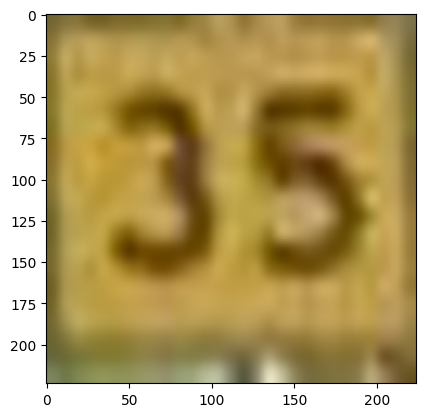

In [7]:
imgplot = plt.imshow(image.astype('uint8'))
print(labels[-1])
print(bboxes[-1])
print(imagePaths[-1])
plt.show()

In [8]:
# normalize -> from [0-255] to [0-1]
data = np.array(data, dtype="float32") / 255.0

# convert to np arrays
labels = np.array(labels)
bboxes = np.array(bboxes, dtype="float32")
imagePaths = np.array(imagePaths)

# one-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels[-1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [9]:
# test-train split 20%,80%

split = train_test_split(data,
                         labels,
                         bboxes,
                         imagePaths,
                         test_size=0.20,
                         random_state=12)

In [10]:
(trainImages, testImages) = split[:2]
(trainLabels, testLabels) = split[2:4]

In [11]:
n_images = 52453
input_tensor=Input(shape=(n_images, 224, 224, 3))
print (input_tensor.shape)
flatten_layer = Flatten()
print (input_tensor.shape)
flatten = flatten_layer(input_tensor) 
print (input_tensor.shape)
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
flatten = flatten_layer(input_tensor) 
flatten = flatten_layer(flatten) 
print (input_tensor.shape)
print (flatten.shape)

(None, 52453, 224, 224, 3)
(None, 52453, 224, 224, 3)
(None, 52453, 224, 224, 3)
(52453, 224, 224, 3)
(52453, 150528)


In [12]:
dropnum = 0.5

In [14]:
model = keras.Sequential()
print(input_tensor.shape)
print(input_tensor.shape)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
print (input_tensor.shape)

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropnum))

model.add(Dense(166, activation='softmax', name = "class_label"))

(52453, 224, 224, 3)
(52453, 224, 224, 3)
(52453, 224, 224, 3)


In [15]:
INIT_LR = 1e-4
NUM_EPOCHS = 26
BATCH_SIZE = 4

In [16]:
losses = {
    "class_label": "categorical_crossentropy",
    # "bounding_box": "mean_squared_error",
}

lossWeights = {
    "class_label": 1.0,
    # "bounding_box": 1.0
}
trainTargets = {
    "class_label": trainLabels,
    # "bounding_box": trainBBoxes
}

testTargets = {
    "class_label": testLabels,
    # "bounding_box": testBBoxes
}

In [26]:
opt = Adam(INIT_LR)

model.compile(loss=losses, 
              optimizer=opt,
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [27]:
#Dropout of 0.5 2 set
H1 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 353s 2s/step - loss: 3.8908 - accuracy: 0.4887 - val_loss: 3.6328 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 357s 2s/step - loss: 3.5186 - accuracy: 0.4939 - val_loss: 3.4577 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 378s 3s/step - loss: 3.3644 - accuracy: 0.4939 - val_loss: 3.4804 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 365s 3s/step - loss: 3.1541 - accuracy: 0.4939 - val_loss: 3.3994 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 366s 3s/step - loss: 3.0734 - accuracy: 0.4957 - val_loss: 3.3765 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 355s 2s/step - loss: 2.6856 - accuracy: 0.5009 - val_loss: 3.4307 - val_accuracy: 0.5103
Epoch 7/26
145/145 [==============================] - 351s 2s/step - loss: 2.3650 - accuracy: 0.5251 - val_loss: 4.0011 - val_accuracy: 0.5034

In [28]:
score = model.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 41s 2s/step - loss: 0.0092 - accuracy: 0.9983
Train loss: 0.009195491671562195
Train accuracy: 0.998266875743866
5/5 [==============================] - 11s 2s/step - loss: 8.9913 - accuracy: 0.5379
Test loss: 8.99134349822998
Test accuracy: 0.5379310250282288


In [29]:
model2 = keras.Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(dropnum))

model2.add(Dense(166, activation='softmax', name = "class_label"))

In [30]:
opt = Adam(INIT_LR)

model2.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 387200)            0         
                                                                 
 dense_1 (Dense)             (None, 256)               99123456  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [31]:
#Dropout of 0.5 1 set
H2 = model2.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 494s 3s/step - loss: 4.4156 - accuracy: 0.4333 - val_loss: 3.7644 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 484s 3s/step - loss: 3.8046 - accuracy: 0.4905 - val_loss: 3.6516 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 487s 3s/step - loss: 3.5158 - accuracy: 0.4870 - val_loss: 3.6010 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 485s 3s/step - loss: 3.2219 - accuracy: 0.4922 - val_loss: 3.4003 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 488s 3s/step - loss: 3.0196 - accuracy: 0.4939 - val_loss: 3.5135 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 491s 3s/step - loss: 2.7185 - accuracy: 0.4957 - val_loss: 3.7058 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 488s 3s/step - loss: 2.4793 - accuracy: 0.5165 - val_loss: 3.3433 - val_accuracy: 0.5034

In [32]:
score = model2.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model2.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 27s 1s/step - loss: 0.0735 - accuracy: 0.9827
Train loss: 0.07346180826425552
Train accuracy: 0.9826689958572388
5/5 [==============================] - 8s 2s/step - loss: 5.6830 - accuracy: 0.5241
Test loss: 5.682952880859375
Test accuracy: 0.5241379141807556


In [33]:
model3 = keras.Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(dropnum))

model3.add(Dense(166, activation='softmax', name = "class_label"))

In [34]:
opt = Adam(INIT_LR)

model3.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [35]:
#Dropout of 0.5 3 set
H3 = model3.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 161s 1s/step - loss: 3.7187 - accuracy: 0.4870 - val_loss: 3.5339 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 152s 1s/step - loss: 3.4865 - accuracy: 0.4939 - val_loss: 3.4382 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 151s 1s/step - loss: 3.3430 - accuracy: 0.4939 - val_loss: 3.5151 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 152s 1s/step - loss: 3.2939 - accuracy: 0.4939 - val_loss: 3.4306 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 152s 1s/step - loss: 3.2822 - accuracy: 0.4939 - val_loss: 3.4454 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 157s 1s/step - loss: 3.2520 - accuracy: 0.4939 - val_loss: 3.4813 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 153s 1s/step - loss: 3.1458 - accuracy: 0.4939 - val_loss: 3.6234 - val_accuracy: 0.4966

In [36]:
score = model3.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model3.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 31s 2s/step - loss: 0.2905 - accuracy: 0.9168
Train loss: 0.29048794507980347
Train accuracy: 0.9168111085891724
5/5 [==============================] - 8s 1s/step - loss: 5.4203 - accuracy: 0.4621
Test loss: 5.420331954956055
Test accuracy: 0.46206897497177124


In [37]:
model4 = keras.Sequential()

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(dropnum))

model4.add(Dense(166, activation='softmax', name = "class_label"))

In [38]:
opt = Adam(INIT_LR)

model4.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [39]:
#Dropout of 0.5 4 set
H4 = model4.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 162s 1s/step - loss: 4.0037 - accuracy: 0.4783 - val_loss: 3.5209 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 153s 1s/step - loss: 3.4630 - accuracy: 0.4939 - val_loss: 3.5163 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 151s 1s/step - loss: 3.3695 - accuracy: 0.4939 - val_loss: 3.5200 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 153s 1s/step - loss: 3.2860 - accuracy: 0.4939 - val_loss: 3.5068 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 149s 1s/step - loss: 3.2304 - accuracy: 0.4939 - val_loss: 3.4665 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 151s 1s/step - loss: 3.2345 - accuracy: 0.4939 - val_loss: 3.5265 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 149s 1s/step - loss: 3.2127 - accuracy: 0.4939 - val_loss: 3.6244 - val_accuracy: 0.4966

In [40]:
score = model4.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model4.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 32s 2s/step - loss: 2.8611 - accuracy: 0.4957
Train loss: 2.861114263534546
Train accuracy: 0.4956672489643097
5/5 [==============================] - 9s 2s/step - loss: 3.7921 - accuracy: 0.4966
Test loss: 3.792146682739258
Test accuracy: 0.4965517222881317


In [17]:
dropnum = 0.2

In [18]:
model5 = keras.Sequential()

model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model5.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model5.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(dropnum))

model5.add(Dense(166, activation='softmax', name = "class_label"))

In [19]:
opt = Adam(INIT_LR)

model5.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model5.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 387200)            0         
                                                                 
 dense_1 (Dense)             (None, 256)               99123456  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                      

In [20]:
#Dropout of 0.2 1 set
H5 = model5.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 453s 3s/step - loss: 3.9946 - accuracy: 0.4662 - val_loss: 3.6973 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 453s 3s/step - loss: 3.5151 - accuracy: 0.4905 - val_loss: 3.6442 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 453s 3s/step - loss: 3.2086 - accuracy: 0.4939 - val_loss: 3.4422 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 452s 3s/step - loss: 2.9188 - accuracy: 0.4939 - val_loss: 3.5633 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 451s 3s/step - loss: 2.7461 - accuracy: 0.4974 - val_loss: 3.6427 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 446s 3s/step - loss: 2.5234 - accuracy: 0.4991 - val_loss: 3.4978 - val_accuracy: 0.5103
Epoch 7/26
145/145 [==============================] - 450s 3s/step - loss: 2.2261 - accuracy: 0.5234 - val_loss: 3.5534 - val_accuracy: 0.4966

In [21]:
score = model5.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model5.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 24s 1s/step - loss: 0.1324 - accuracy: 0.9671
Train loss: 0.13236276805400848
Train accuracy: 0.9670710563659668
5/5 [==============================] - 8s 2s/step - loss: 6.6114 - accuracy: 0.5379
Test loss: 6.611390590667725
Test accuracy: 0.5379310250282288


In [22]:
model6 = keras.Sequential()

model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model6.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model6.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model6.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(dropnum))

model6.add(Dense(166, activation='softmax', name = "class_label"))

In [23]:
opt = Adam(INIT_LR)

model6.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model6.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [24]:
#Dropout of 0.2 2 set
H6 = model6.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 205s 1s/step - loss: 3.7755 - accuracy: 0.4887 - val_loss: 3.6166 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 208s 1s/step - loss: 3.4044 - accuracy: 0.4939 - val_loss: 3.5171 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 202s 1s/step - loss: 3.2720 - accuracy: 0.4939 - val_loss: 3.4649 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 208s 1s/step - loss: 3.0155 - accuracy: 0.4939 - val_loss: 3.4447 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 206s 1s/step - loss: 2.7915 - accuracy: 0.5043 - val_loss: 3.4213 - val_accuracy: 0.5034
Epoch 6/26
145/145 [==============================] - 204s 1s/step - loss: 2.4882 - accuracy: 0.5147 - val_loss: 3.4844 - val_accuracy: 0.4897
Epoch 7/26
145/145 [==============================] - 209s 1s/step - loss: 2.0973 - accuracy: 0.5442 - val_loss: 3.5867 - val_accuracy: 0.4897

In [25]:
score = model6.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model6.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 27s 1s/step - loss: 0.0031 - accuracy: 1.0000
Train loss: 0.0030881015118211508
Train accuracy: 1.0
5/5 [==============================] - 8s 2s/step - loss: 9.4352 - accuracy: 0.5379
Test loss: 9.435182571411133
Test accuracy: 0.5379310250282288


In [26]:
model7 = keras.Sequential()

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model7.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model7.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model7.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(dropnum))

model7.add(Dense(166, activation='softmax', name = "class_label"))

In [27]:
opt = Adam(INIT_LR)

model7.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model7.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [28]:
#Dropout of 0.2 3 set
H7 = model7.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 139s 940ms/step - loss: 3.7265 - accuracy: 0.4887 - val_loss: 3.4839 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 142s 984ms/step - loss: 3.3567 - accuracy: 0.4939 - val_loss: 3.4297 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 141s 970ms/step - loss: 3.2141 - accuracy: 0.4939 - val_loss: 3.4248 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 139s 956ms/step - loss: 3.1546 - accuracy: 0.4939 - val_loss: 3.4799 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 142s 979ms/step - loss: 3.0881 - accuracy: 0.4922 - val_loss: 3.5856 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 140s 966ms/step - loss: 2.9840 - accuracy: 0.4957 - val_loss: 3.4872 - val_accuracy: 0.5034
Epoch 7/26
145/145 [==============================] - 143s 989ms/step - loss: 2.8709 - accuracy: 0.5026 - val_loss: 3.6453 -

In [29]:
score = model7.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model7.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 28s 1s/step - loss: 0.0171 - accuracy: 0.9931
Train loss: 0.017123974859714508
Train accuracy: 0.9930675625801086
5/5 [==============================] - 8s 2s/step - loss: 8.8439 - accuracy: 0.5310
Test loss: 8.843937873840332
Test accuracy: 0.5310344696044922


In [30]:
model8 = keras.Sequential()

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model8.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model8.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model8.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model8.add(Flatten())
model8.add(Dense(256, activation='relu'))
model8.add(Dropout(dropnum))

model8.add(Dense(166, activation='softmax', name = "class_label"))

In [31]:
opt = Adam(INIT_LR)

model8.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model8.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_21 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                 

In [32]:
#Dropout of 0.2 4 set
H8 = model8.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/26
145/145 [==============================] - 137s 925ms/step - loss: 3.8639 - accuracy: 0.4835 - val_loss: 3.6005 - val_accuracy: 0.4966
Epoch 2/26
145/145 [==============================] - 132s 910ms/step - loss: 3.4599 - accuracy: 0.4939 - val_loss: 3.5620 - val_accuracy: 0.4966
Epoch 3/26
145/145 [==============================] - 134s 925ms/step - loss: 3.3210 - accuracy: 0.4939 - val_loss: 3.5312 - val_accuracy: 0.4966
Epoch 4/26
145/145 [==============================] - 133s 921ms/step - loss: 3.2001 - accuracy: 0.4939 - val_loss: 3.5236 - val_accuracy: 0.4966
Epoch 5/26
145/145 [==============================] - 131s 905ms/step - loss: 3.1871 - accuracy: 0.4939 - val_loss: 3.5336 - val_accuracy: 0.4966
Epoch 6/26
145/145 [==============================] - 131s 907ms/step - loss: 3.1506 - accuracy: 0.4939 - val_loss: 3.5598 - val_accuracy: 0.4966
Epoch 7/26
145/145 [==============================] - 137s 945ms/step - loss: 3.1299 - accuracy: 0.4939 - val_loss: 3.5982 -

In [33]:
score = model8.evaluate(trainImages, trainTargets, verbose = 1) 

print('Train loss:', score[0]) 
print('Train accuracy:', score[1])

score = model8.evaluate(testImages, testTargets, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

19/19 [==============================] - 28s 1s/step - loss: 2.5647 - accuracy: 0.5147
Train loss: 2.564706325531006
Train accuracy: 0.5147313475608826
5/5 [==============================] - 7s 1s/step - loss: 3.7826 - accuracy: 0.5310
Test loss: 3.7825734615325928
Test accuracy: 0.5310344696044922


In [ ]:
# All of this is extra numbers \/

In [ ]:
#Dropout of 0.2 playing with batch
H21 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=3,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
193/193 [==============================] - 442s 2s/step - loss: 3.7938 - accuracy: 0.4870 - val_loss: 3.5913 - val_accuracy: 0.4966
Epoch 2/10
193/193 [==============================] - 434s 2s/step - loss: 3.3867 - accuracy: 0.4939 - val_loss: 3.5254 - val_accuracy: 0.4966
Epoch 3/10
193/193 [==============================] - 440s 2s/step - loss: 3.1339 - accuracy: 0.4957 - val_loss: 3.4667 - val_accuracy: 0.4966
Epoch 4/10
193/193 [==============================] - 431s 2s/step - loss: 2.9822 - accuracy: 0.4957 - val_loss: 3.5297 - val_accuracy: 0.4966
Epoch 5/10
193/193 [==============================] - 431s 2s/step - loss: 2.7227 - accuracy: 0.5165 - val_loss: 3.5190 - val_accuracy: 0.5172
Epoch 6/10
193/193 [==============================] - 430s 2s/step - loss: 2.3841 - accuracy: 0.5338 - val_loss: 3.6303 - val_accuracy: 0.4966
Epoch 7/10
193/193 [==============================] - 420s 2s/step - loss: 1.9994 - accuracy: 0.5719 - val_loss: 3.4891 - val_accuracy: 0.5241

In [ ]:
#Dropout of 0.2 playing with batch
H21 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=4,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
145/145 [==============================] - 355s 2s/step - loss: 0.5339 - accuracy: 0.8614 - val_loss: 4.9668 - val_accuracy: 0.5517
Epoch 2/10
145/145 [==============================] - 358s 2s/step - loss: 0.3734 - accuracy: 0.9047 - val_loss: 5.5907 - val_accuracy: 0.5586
Epoch 3/10
145/145 [==============================] - 355s 2s/step - loss: 0.2420 - accuracy: 0.9445 - val_loss: 6.2523 - val_accuracy: 0.5517
Epoch 4/10
145/145 [==============================] - 370s 3s/step - loss: 0.2510 - accuracy: 0.9376 - val_loss: 6.5855 - val_accuracy: 0.5655
Epoch 5/10
145/145 [==============================] - 354s 2s/step - loss: 0.1578 - accuracy: 0.9653 - val_loss: 6.6195 - val_accuracy: 0.5448
Epoch 6/10
145/145 [==============================] - 347s 2s/step - loss: 0.1678 - accuracy: 0.9549 - val_loss: 6.2592 - val_accuracy: 0.5310
Epoch 7/10
145/145 [==============================] - 352s 2s/step - loss: 0.1509 - accuracy: 0.9636 - val_loss: 6.7890 - val_accuracy: 0.5172

In [ ]:
#Dropout of 0.2 playing with batch
H21 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=5,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
116/116 [==============================] - 310s 3s/step - loss: 0.0416 - accuracy: 0.9913 - val_loss: 8.1658 - val_accuracy: 0.5517
Epoch 2/10
116/116 [==============================] - 310s 3s/step - loss: 0.0552 - accuracy: 0.9896 - val_loss: 8.5272 - val_accuracy: 0.5448
Epoch 3/10
116/116 [==============================] - 313s 3s/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 8.4563 - val_accuracy: 0.5241
Epoch 4/10
116/116 [==============================] - 317s 3s/step - loss: 0.0503 - accuracy: 0.9861 - val_loss: 8.7329 - val_accuracy: 0.5586
Epoch 5/10
116/116 [==============================] - 307s 3s/step - loss: 0.0342 - accuracy: 0.9983 - val_loss: 7.8955 - val_accuracy: 0.5103
Epoch 6/10
116/116 [==============================] - 309s 3s/step - loss: 0.0259 - accuracy: 0.9948 - val_loss: 9.1521 - val_accuracy: 0.5517
Epoch 7/10
116/116 [==============================] - 308s 3s/step - loss: 0.0197 - accuracy: 0.9931 - val_loss: 10.0625 - val_accuracy: 0.551

In [ ]:
#Dropout of 0.2 orginal run
H21 = model.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
157/157 [==============================] - 894s 6s/step - loss: 3.5939 - accuracy: 0.4904 - val_loss: 3.1705 - val_accuracy: 0.5072
Epoch 2/10
157/157 [==============================] - 878s 6s/step - loss: 3.0831 - accuracy: 0.4940 - val_loss: 2.8231 - val_accuracy: 0.5088
Epoch 3/10
157/157 [==============================] - 817s 5s/step - loss: 2.6395 - accuracy: 0.5279 - val_loss: 2.5404 - val_accuracy: 0.5375
Epoch 4/10
157/157 [==============================] - 814s 5s/step - loss: 2.1477 - accuracy: 0.5945 - val_loss: 1.9734 - val_accuracy: 0.6300
Epoch 5/10
157/157 [==============================] - 815s 5s/step - loss: 1.5719 - accuracy: 0.6910 - val_loss: 1.5014 - val_accuracy: 0.7129
Epoch 6/10
157/157 [==============================] - 843s 5s/step - loss: 1.2135 - accuracy: 0.7787 - val_loss: 1.1886 - val_accuracy: 0.7703
Epoch 7/10
157/157 [==============================] - 806s 5s/step - loss: 1.0518 - accuracy: 0.8066 - val_loss: 1.1139 - val_accuracy: 0.7847

In [ ]:
#one extra conv2d,conv2d, pooling block
model2 = keras.Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(166, activation='softmax', name = "class_label"))



In [ ]:
opt = Adam(INIT_LR)

model2.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [ ]:
H2 = model2.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
157/157 [==============================] - 855s 5s/step - loss: 3.5637 - accuracy: 0.4896 - val_loss: 3.2097 - val_accuracy: 0.5072
Epoch 2/10
157/157 [==============================] - 828s 5s/step - loss: 3.2357 - accuracy: 0.4932 - val_loss: 3.0899 - val_accuracy: 0.5072
Epoch 3/10
157/157 [==============================] - 812s 5s/step - loss: 3.0698 - accuracy: 0.4932 - val_loss: 2.9444 - val_accuracy: 0.5088
Epoch 4/10
157/157 [==============================] - 851s 5s/step - loss: 2.8876 - accuracy: 0.5036 - val_loss: 2.8684 - val_accuracy: 0.5263
Epoch 5/10
157/157 [==============================] - 847s 5s/step - loss: 2.6898 - accuracy: 0.5307 - val_loss: 2.6194 - val_accuracy: 0.5534
Epoch 6/10
157/157 [==============================] - 848s 5s/step - loss: 2.2736 - accuracy: 0.5718 - val_loss: 2.2186 - val_accuracy: 0.5774
Epoch 7/10
157/157 [==============================] - 849s 5s/step - loss: 1.7548 - accuracy: 0.6571 - val_loss: 1.6781 - val_accuracy: 0.6635

In [ ]:
#two extra conv2d,conv2d, pooling block
model3 = keras.Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(166, activation='softmax', name = "class_label"))



In [ ]:
opt = Adam(INIT_LR)

model3.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                  

In [ ]:
H3 = model3.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 182s 5s/step - loss: 4.1749 - accuracy: 0.4783 - val_loss: 3.6237 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 174s 5s/step - loss: 3.4792 - accuracy: 0.4939 - val_loss: 3.5203 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 179s 5s/step - loss: 3.3659 - accuracy: 0.4939 - val_loss: 3.5733 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 173s 5s/step - loss: 3.3084 - accuracy: 0.4939 - val_loss: 3.4369 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 174s 5s/step - loss: 3.2360 - accuracy: 0.4939 - val_loss: 3.4693 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 180s 5s/step - loss: 3.2278 - accuracy: 0.4939 - val_loss: 3.4305 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 169s 5s/step - loss: 3.1941 - accuracy: 0.4939 - val_loss: 3.4294 - val_accuracy: 0.4966
Epoch 8/10
37

In [ ]:
#one extra conv2d,conv2d, pooling block
model21 = keras.Sequential()
model21.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model21.add(Conv2D(filters=32, kernel_size=3, activation='relu'))

input_tensor=tf.reshape(input_tensor, [n_images, 224, 224, 3])
model21.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model21.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model21.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model21.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))

model21.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model21.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model21.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), input_shape=(input_tensor)))


model21.add(Flatten())
model21.add(Dense(256, activation='relu'))
model21.add(Dropout(0.2))

model21.add(Dense(166, activation='softmax', name = "class_label"))



In [ ]:
opt = Adam(INIT_LR)

model21.compile(loss=losses, 
              optimizer=opt, 
              metrics=["accuracy"], 
              loss_weights=lossWeights)

print(model21.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [ ]:
H221 = model21.fit(
    trainImages, trainTargets,
    validation_data=(testImages, testTargets),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    verbose=1,
    )

Epoch 1/10
37/37 [==============================] - 217s 6s/step - loss: 3.8822 - accuracy: 0.4818 - val_loss: 3.6019 - val_accuracy: 0.4966
Epoch 2/10
37/37 [==============================] - 196s 5s/step - loss: 3.5166 - accuracy: 0.4939 - val_loss: 3.5814 - val_accuracy: 0.4966
Epoch 3/10
37/37 [==============================] - 207s 6s/step - loss: 3.4143 - accuracy: 0.4939 - val_loss: 3.4995 - val_accuracy: 0.4966
Epoch 4/10
37/37 [==============================] - 210s 6s/step - loss: 3.2910 - accuracy: 0.4939 - val_loss: 3.4630 - val_accuracy: 0.4966
Epoch 5/10
37/37 [==============================] - 209s 6s/step - loss: 3.2253 - accuracy: 0.4939 - val_loss: 3.4247 - val_accuracy: 0.4966
Epoch 6/10
37/37 [==============================] - 210s 6s/step - loss: 3.1716 - accuracy: 0.4939 - val_loss: 3.4195 - val_accuracy: 0.4966
Epoch 7/10
37/37 [==============================] - 207s 6s/step - loss: 3.0892 - accuracy: 0.4939 - val_loss: 3.4169 - val_accuracy: 0.4966
Epoch 8/10
37